# Viés e Variância

Para aprendermos um pouco mais sobre os conceitos de viés e variância, visualizaremos o comportamento modelos de classificação induzidos por alguns algoritmos em diferentes bases de dados. Para conseguirmos visualizá-los,  utilizaremos algumas bases artificiais em duas dimensões. Os mesmos conceitos podem ser aplicados em bases reais com maior dimensão.

Primeiro, importaremos a função plot_decision_boundaries que nos perimitirá visualizar as bordas de decisão dos modelos de classificação. Obtivemos ela no seguinte link: https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Utilities/ML-Python-utils.py

Para mais material sobre viés, variância e teoria do aprendizado estatístico olhar:
https://arxiv.org/abs/0810.4752

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    
    classes = np.unique(y)

    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Right now it only works with binary tasks: expand both dictionaries or use cmap for multiclass tasks
    colors = {0:'red', 1:'green'}
    markers = {0: 'o', 1: '^'}
    
    # Plotting
    #plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdYlGn')
    for class_v in classes:
        imask = y == class_v
        plt.scatter(X[imask, 0], X[imask, 1], c=colors[class_v], alpha=0.8, marker=markers[class_v])
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='RdYlGn')
    plt.xlabel("x1",fontsize=15)
    plt.ylabel("x2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [2]:
def plot_2D_task(X, y):
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x1=X[:,0], x2=X[:,1], y=y))
    colors = {0:'red', 1:'green'}
    markers = {0: 'o', 1: '^'}
    fig, ax = plt.subplots()
    grouped = df.groupby('y')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key], marker=markers[key])
    plt.show()

# Viés

O viés de indução de um algoritmo é o conjunto de pressupostos que um algoritmo usa para encontrar uma hipótese que se ajuste aos dados de treinamento. Algoritmos com viés alto buscam em um espaço de poucas hipóteses enquanto algoritmos com viés baixo buscam em um espaço grande de hipóteses.

Para entendermos melhor o conceito de viés, observaremos a borda de decisão de modelos gerados por alguns algoritmos de classificação em 3 bases diferentes.

Primeiro, geraremos uma base simples, com pouca sobreposição, usando a função make_classification. Faremos uma breve descrição geométrica do viés de busca de alguns algoritmos de classificação a fim de ilustrá-los. Não se preocupe em entender agora como os algoritmos encontram esses modelos, apenas note que os modelos induzidos por algoritmos diferentes também são diferentes. Isso está relacionado ao viés.

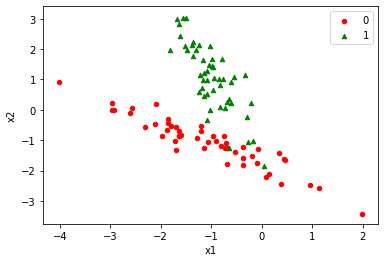

In [3]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from pandas import DataFrame
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# generate 2d classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,
                           class_sep=1, flip_y=0,weights=[0.5,0.5], random_state = 1234)

plot_2D_task(X, y)

### Árvores de Decisão

Árvores de decisão fazem cortes ortogonais no espaço de atributos.

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

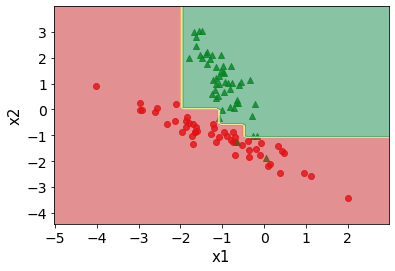

In [4]:
plot_decision_boundaries(X,y, DecisionTreeClassifier, random_state=1)

### Redes Neurais

Com uma camada oculta, redes neurais fazem cortes lineares no espaço de atributos com tantas retas quanto neurônios na camada oculta.

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

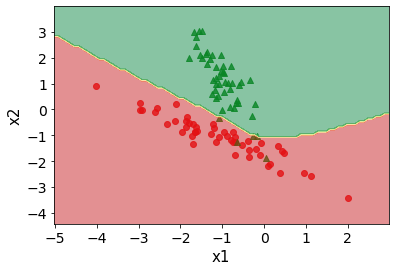

In [5]:
plot_decision_boundaries(X, y, MLPClassifier, random_state=1, max_iter=500)

### SVM

Sem nenhum kernel (também chamado de kernel linear), o SVM otimiza uma reta para cortar o espaço.

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

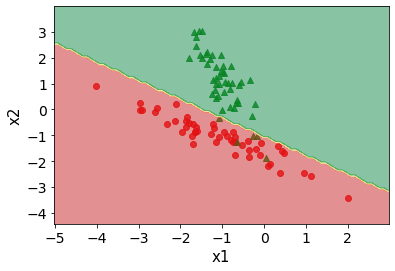

In [6]:
plot_decision_boundaries(X, y, LinearSVC, random_state=1)

Com diferentes kernels, os dados são levados para outro espaço de atributos. Os efeitos no espaço original de atributos dependerá do kernel. No exemplo abaixo, o kernel rbf será utilizado. 

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

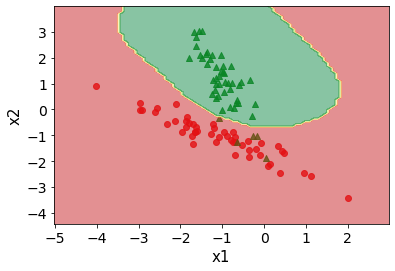

In [7]:
plot_decision_boundaries(X, y, SVC, random_state=1)

### KNN

No KNN com k = 1, regiões são rotuladas depedendo da classe do exemplo mais próximo.

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

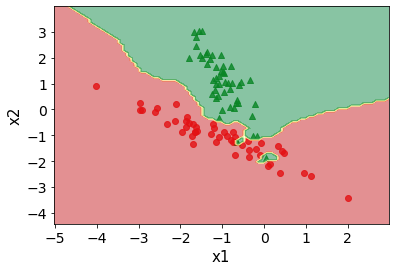

In [8]:
plot_decision_boundaries(X, y, KNeighborsClassifier, n_neighbors=1)

## Viés - segunda base

Para observar os efeitos de um determinado viés de busca, vamos observar os modelos gerados em outra base, dessa vez definidas por círculos, um interno e outro externo. Incluímos também um pouco de ruído na base. Está tudo bem - algoritmos de aprendizado de máquina levam em consideração que pode existir uma quantidade baixa de ruído.

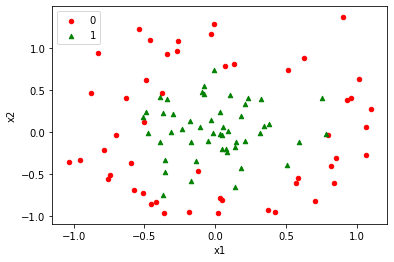

In [9]:
# generate 2d circles dataset
Xc, yc = make_circles(n_samples=100, factor = 0.4, noise = 0.2, random_state = 1234)
plot_2D_task(Xc, yc)

### Árvore de decisão

Apesar do viés da árvore de decisão não permitir que ela recorte o espaço em um círculo, ela conseguiu definir, com algum nível de imperfeição, uma região para a classe 1. 

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

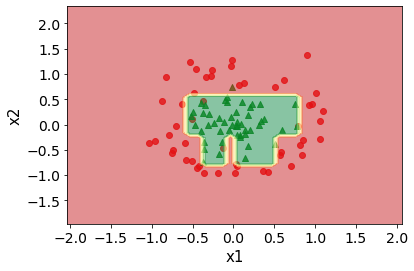

In [10]:
plot_decision_boundaries(Xc, yc, DecisionTreeClassifier, random_state=1)

### Redes Neurais

O viés da rede neural com uma camada escondida também não permite formas circulares, mas nosso modelo aproximou como pode usando retas.

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

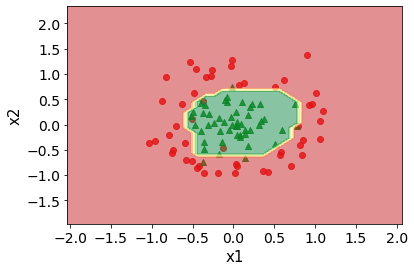

In [11]:
plot_decision_boundaries(Xc, yc, MLPClassifier, random_state=1, max_iter=1000)

### SVM linear

O viés do SVM sem kernel não permite que ele aproxime bem nenhum corte para separar as duas classes.

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

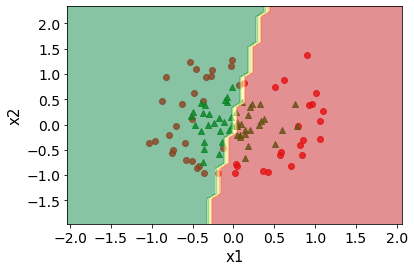

In [12]:
plot_decision_boundaries(Xc, yc, LinearSVC, random_state=1)

### SVM rbf

Já com kernel rbf, o modelo gerado separa muito bem as classes.

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

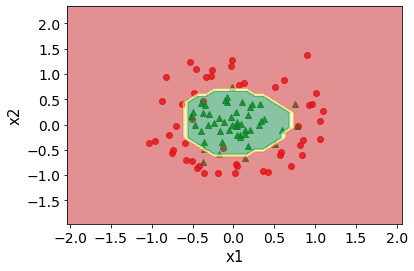

In [13]:
plot_decision_boundaries(Xc, yc, SVC, random_state=1)

### 1NN

1NN encontrou uma região interessante para explicar as classes

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

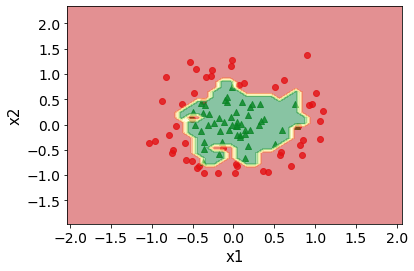

In [14]:
plot_decision_boundaries(Xc, yc, KNeighborsClassifier, n_neighbors=1)

## Viés - terceira base

A seguir, usaremos uma base com formatos de lua, novamente adicionando ruído.

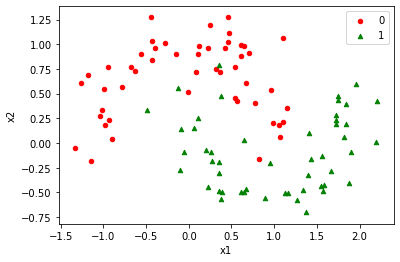

In [15]:
# generate 2d moons dataset
Xm, ym = make_moons(n_samples=100, noise = 0.2, random_state = 1234)

plot_2D_task(Xm, ym)

### Árvore de decisão

Que fenômeno você observa no corte feito pela árvore de decisão abaixo?

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

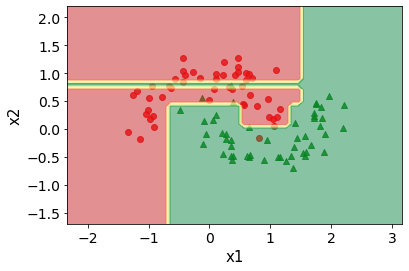

In [16]:
plot_decision_boundaries(Xm, ym, DecisionTreeClassifier, random_state=1)

### Redes Neurais

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

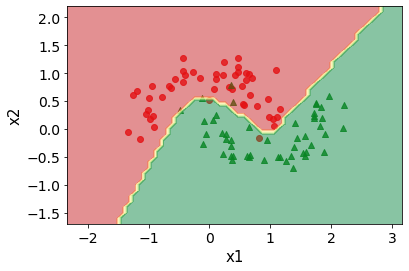

In [17]:
plot_decision_boundaries(Xm, ym, MLPClassifier, random_state=1, max_iter=1500)

### SVM linear

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

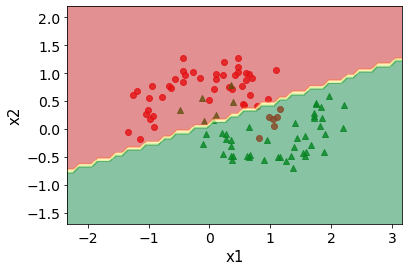

In [18]:
plot_decision_boundaries(Xm, ym, LinearSVC, random_state=1)

### SVM rbf

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

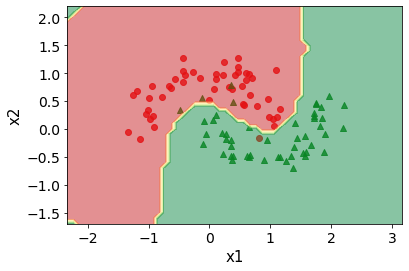

In [19]:
plot_decision_boundaries(Xm, ym, SVC, random_state=1)

### 1NN

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

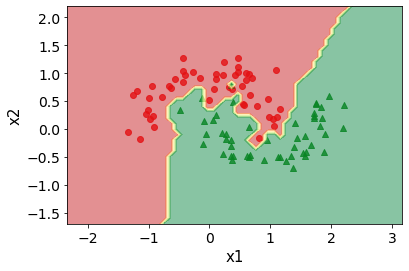

In [20]:
plot_decision_boundaries(Xm, ym, KNeighborsClassifier, n_neighbors=1)

# Variância

Variância é um tipo de erro em Aprendizado de Máquina no qual algoritmos de classificação são sensíveis a flutuações quando induzem modelos. Para obervar este conceito, geraremos bases com tamanhos diferentes em número de exemplos e com dois tipos de ruído.

## Variância - número de exemplos

A seguir, geraremos 3 versões da base moons, cada uma com tamanhos diferentes.

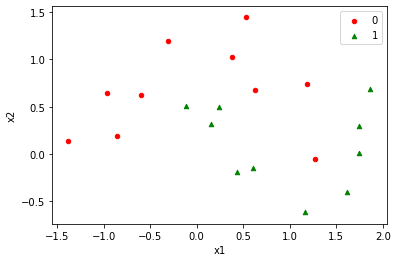

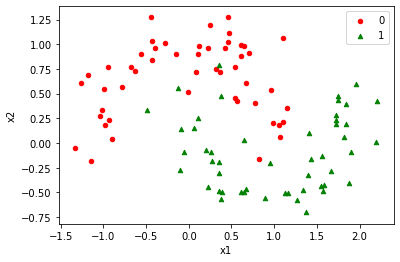

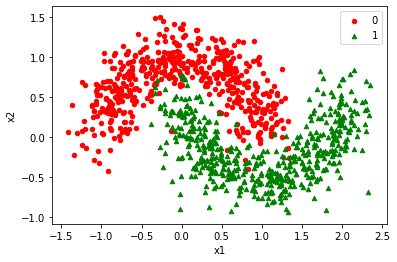

In [21]:
# generate 2d moons dataset
Xm1, ym1 = make_moons(n_samples=20, noise = 0.2, random_state = 1234)
plot_2D_task(Xm1, ym1)

# generate 2d moons dataset
Xm2, ym2 = make_moons(n_samples=100, noise = 0.2, random_state = 1234)
plot_2D_task(Xm2, ym2)

# generate 2d moons dataset
Xm3, ym3 = make_moons(n_samples=1000, noise = 0.2, random_state = 1234)
plot_2D_task(Xm3, ym3)

### Árvore de decisão

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

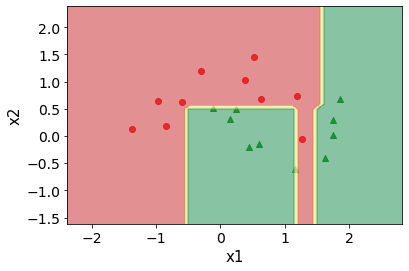

In [22]:
plot_decision_boundaries(Xm1, ym1, DecisionTreeClassifier, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

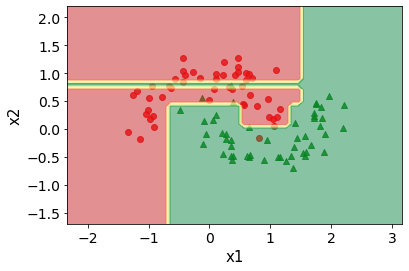

In [23]:
plot_decision_boundaries(Xm2, ym2, DecisionTreeClassifier, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

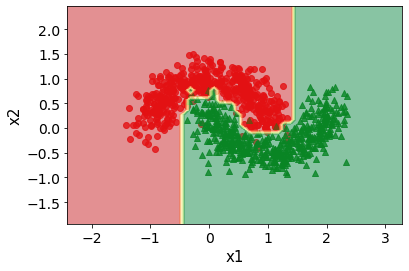

In [24]:
plot_decision_boundaries(Xm3, ym3, DecisionTreeClassifier, random_state=1)

### Redes Neurais

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

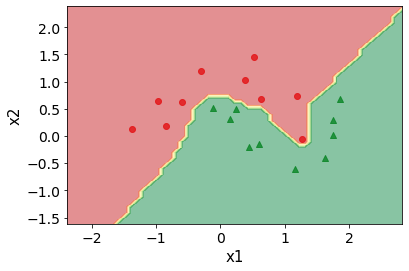

In [25]:
plot_decision_boundaries(Xm1, ym1, MLPClassifier, random_state=1, max_iter=1500)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

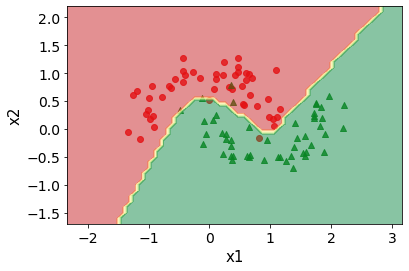

In [26]:
plot_decision_boundaries(Xm2, ym2, MLPClassifier, random_state=1, max_iter=1500)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

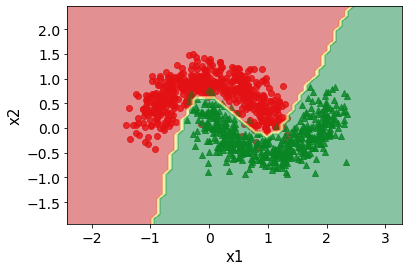

In [27]:
plot_decision_boundaries(Xm3, ym3, MLPClassifier, random_state=1, max_iter=1500)

### SVM linear

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

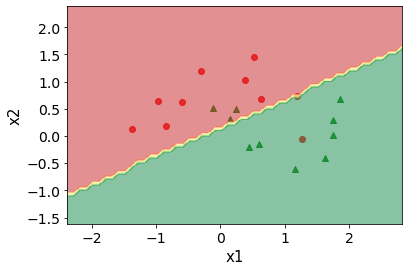

In [28]:
plot_decision_boundaries(Xm1, ym1, LinearSVC, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

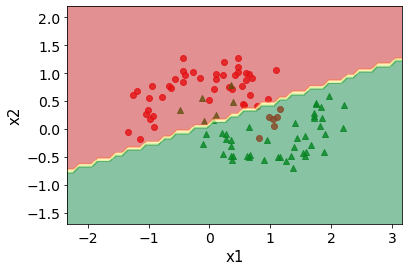

In [29]:
plot_decision_boundaries(Xm2, ym2, LinearSVC, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

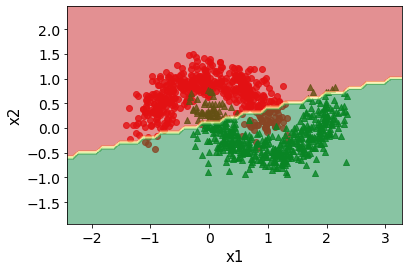

In [30]:
plot_decision_boundaries(Xm3, ym3, LinearSVC, random_state=1)

### SVM rbf

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

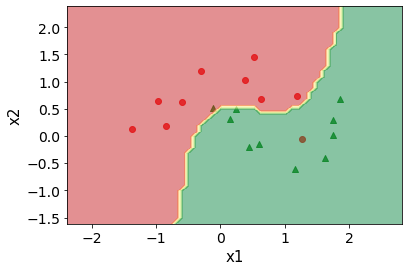

In [31]:
plot_decision_boundaries(Xm1, ym1, SVC, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

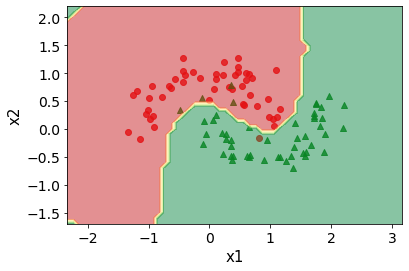

In [32]:
plot_decision_boundaries(Xm2, ym2, SVC, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

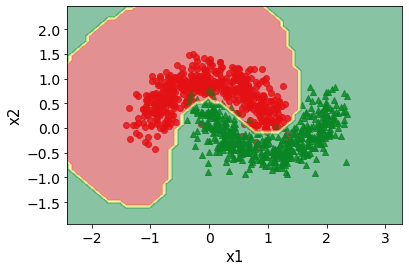

In [33]:
plot_decision_boundaries(Xm3, ym3, SVC, random_state=1)

### 1NN

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

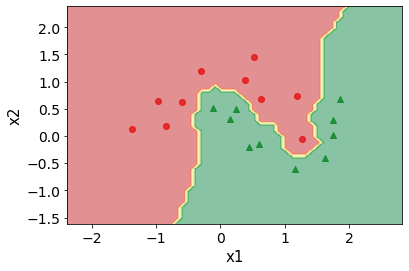

In [34]:
plot_decision_boundaries(Xm1, ym1, KNeighborsClassifier, n_neighbors = 1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

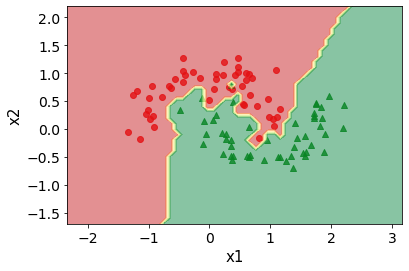

In [35]:
plot_decision_boundaries(Xm2, ym2, KNeighborsClassifier, n_neighbors = 1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

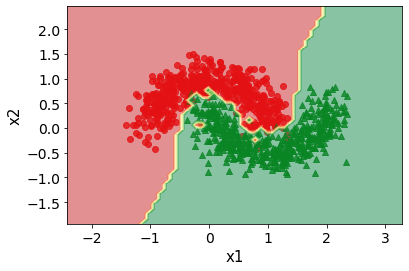

In [36]:
plot_decision_boundaries(Xm3, ym3, KNeighborsClassifier, n_neighbors = 1)

## Variância - ruído em atributo preditivo

O ruído em atributo preditivo pode ser entendido como perturbações aleatórias nos valores dos atributos. Alguns algortimos de classificação podem tentar aprender esses ruídos, aumentando dessa forma sua variância.

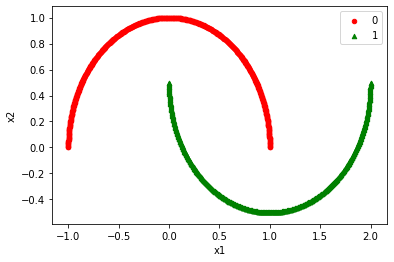

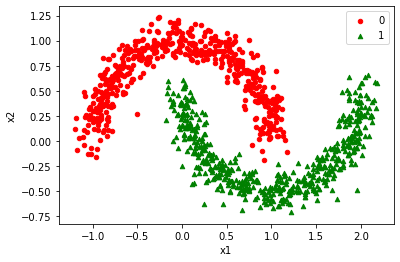

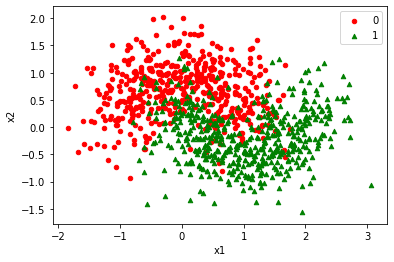

In [37]:
# generate 2d moons dataset
Xm1, ym1 = make_moons(n_samples=1000, noise = 0, random_state = 1234)
plot_2D_task(Xm1, ym1)

# generate 2d moons dataset
Xm2, ym2 = make_moons(n_samples=1000, noise = 0.1, random_state = 1234)
plot_2D_task(Xm2, ym2)

# generate 2d moons dataset
Xm3, ym3 = make_moons(n_samples=1000, noise = 0.4, random_state = 1234)
plot_2D_task(Xm3, ym3)

### Árvore de Decisão

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

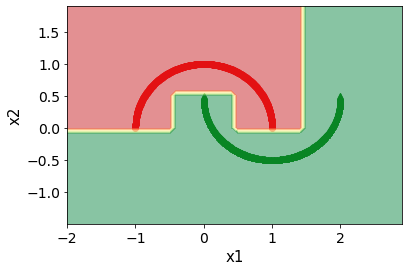

In [38]:
plot_decision_boundaries(Xm1, ym1, DecisionTreeClassifier, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

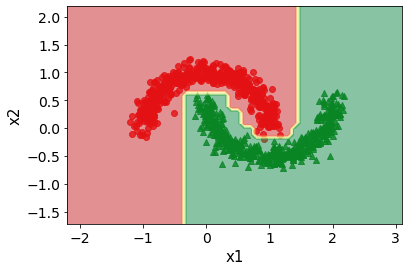

In [39]:
plot_decision_boundaries(Xm2, ym2, DecisionTreeClassifier, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

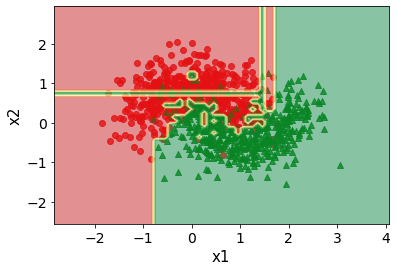

In [40]:
plot_decision_boundaries(Xm3, ym3, DecisionTreeClassifier, random_state=1)

### Redes Neurais

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

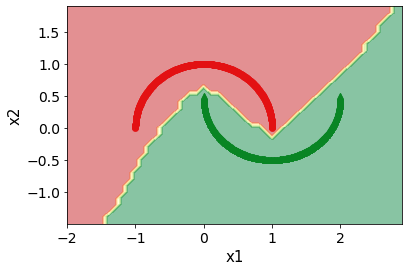

In [41]:
plot_decision_boundaries(Xm1, ym1, MLPClassifier, random_state=1, max_iter=1000)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

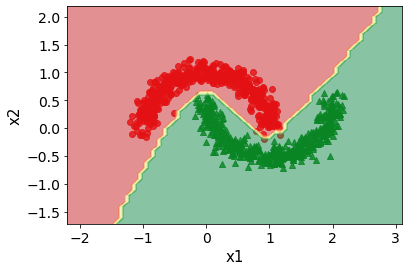

In [42]:
plot_decision_boundaries(Xm2, ym2, MLPClassifier, random_state=1, max_iter=1000)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

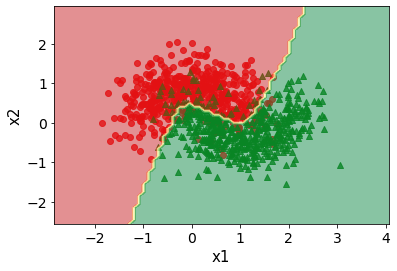

In [43]:
plot_decision_boundaries(Xm3, ym3, MLPClassifier, random_state=1, max_iter=1000)

### SVM linear

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

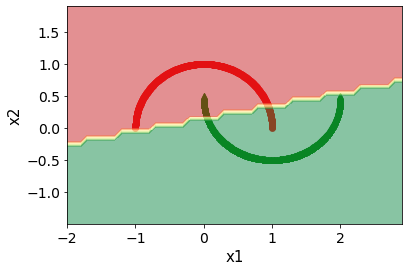

In [44]:
plot_decision_boundaries(Xm1, ym1, LinearSVC, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

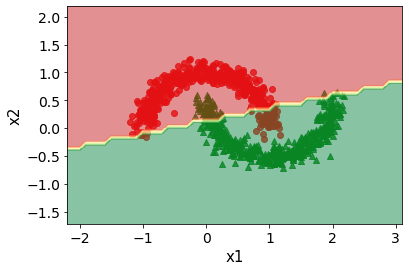

In [45]:
plot_decision_boundaries(Xm2, ym2, LinearSVC, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

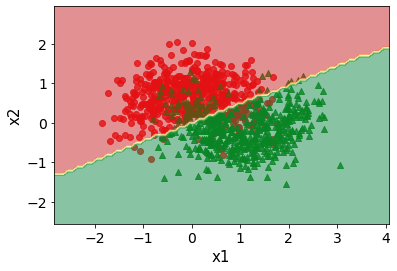

In [46]:
plot_decision_boundaries(Xm3, ym3, LinearSVC, random_state=1)

### SVM rbf

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

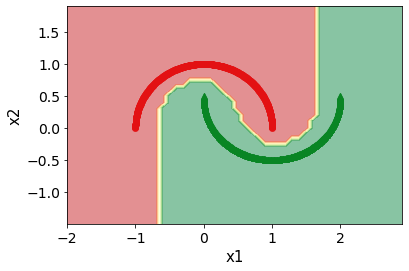

In [47]:
plot_decision_boundaries(Xm1, ym1, SVC, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

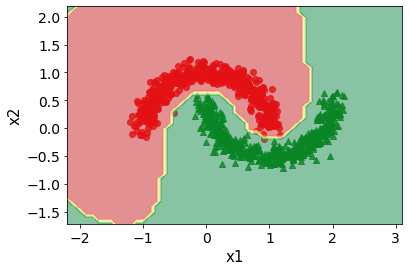

In [48]:
plot_decision_boundaries(Xm2, ym2, SVC, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

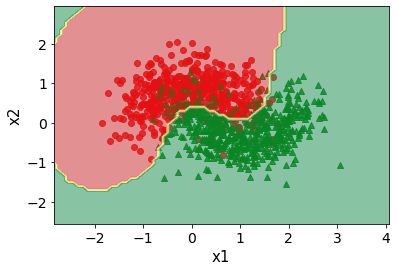

In [49]:
plot_decision_boundaries(Xm3, ym3, SVC, random_state=1)

### 1NN

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

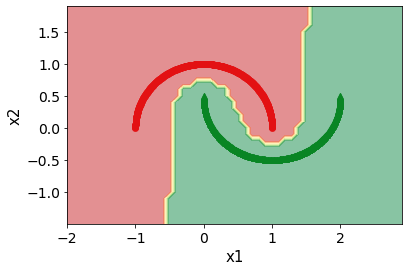

In [50]:
plot_decision_boundaries(Xm1, ym1, KNeighborsClassifier, n_neighbors=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

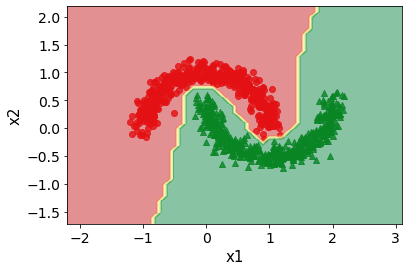

In [51]:
plot_decision_boundaries(Xm2, ym2, KNeighborsClassifier, n_neighbors=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

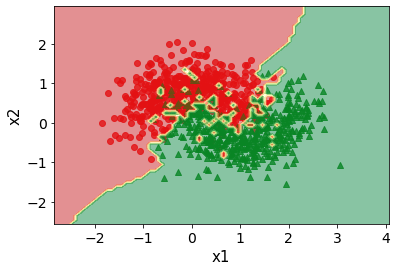

In [52]:
plot_decision_boundaries(Xm3, ym3, KNeighborsClassifier, n_neighbors=1)

## Variância - ruído em atributo alvo

O ruído em atributo alvo modifica é um erro no rótulo de uma parte dos exemplos. Alguns algoritmos de classificação podem tentar aprender este ruído aumentando sua variância.

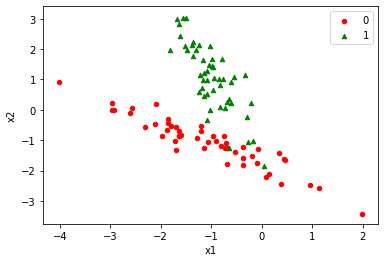

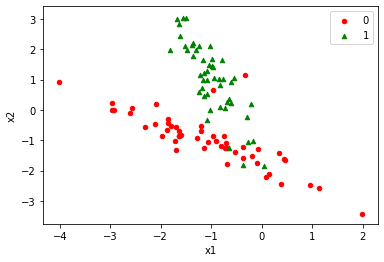

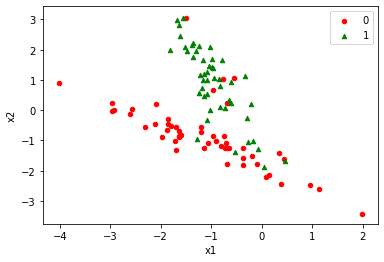

In [53]:
# generate 2d classification dataset
Xcl1, ycl1 = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,
                           class_sep=1, flip_y=0,weights=[0.5,0.5], random_state = 1234)

plot_2D_task(Xcl1, ycl1)

Xcl2, ycl2 = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,
                           class_sep=1, flip_y=0.1,weights=[0.5,0.5], random_state = 1234)

plot_2D_task(Xcl2, ycl2)

Xcl3, ycl3 = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,
                           class_sep=1, flip_y=0.2,weights=[0.5,0.5], random_state = 1234)
Xcl3 = np.flip(Xcl3, axis=1)

plot_2D_task(Xcl3, ycl3)

### Árvore de Decisão

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

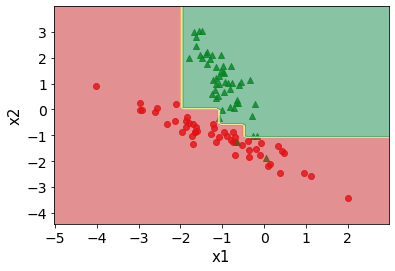

In [54]:
plot_decision_boundaries(Xcl1, ycl1, DecisionTreeClassifier, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

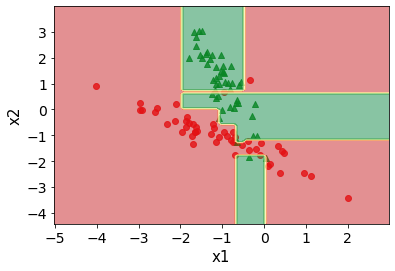

In [55]:
plot_decision_boundaries(Xcl2, ycl2, DecisionTreeClassifier, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

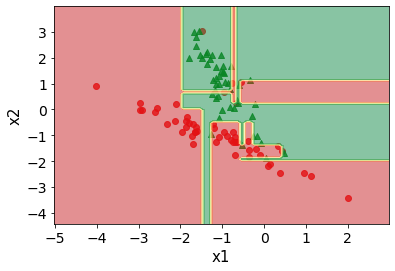

In [56]:
plot_decision_boundaries(Xcl3, ycl3, DecisionTreeClassifier, random_state=1)

### Redes Neurais

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

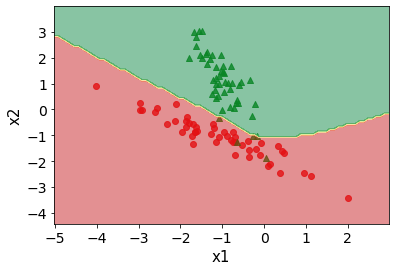

In [57]:
plot_decision_boundaries(Xcl1, ycl1, MLPClassifier, random_state=1, max_iter=1000)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

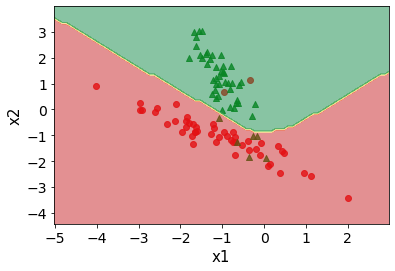

In [58]:
plot_decision_boundaries(Xcl2, ycl2, MLPClassifier, random_state=1, max_iter=1000)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

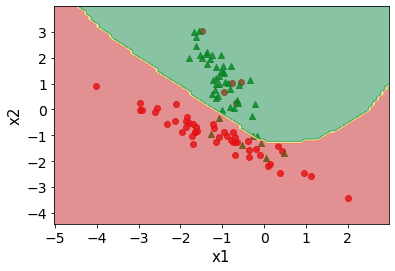

In [59]:
plot_decision_boundaries(Xcl3, ycl3, MLPClassifier, random_state=1, max_iter=1000)

### SVM Linear

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

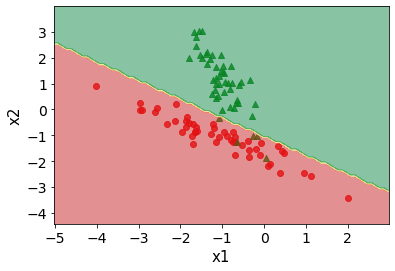

In [60]:
plot_decision_boundaries(Xcl1, ycl1, LinearSVC, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

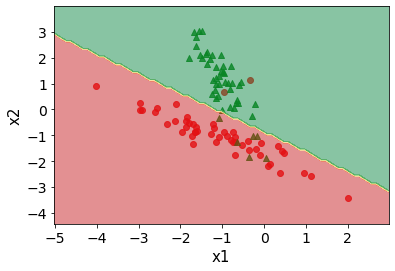

In [61]:
plot_decision_boundaries(Xcl2, ycl2, LinearSVC, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

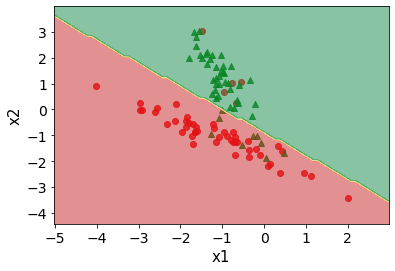

In [62]:
plot_decision_boundaries(Xcl3, ycl3, LinearSVC, random_state=1)

### SVM rbf

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

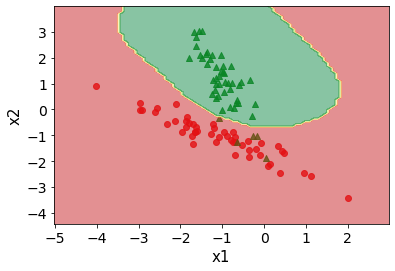

In [63]:
plot_decision_boundaries(Xcl1, ycl1, SVC, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

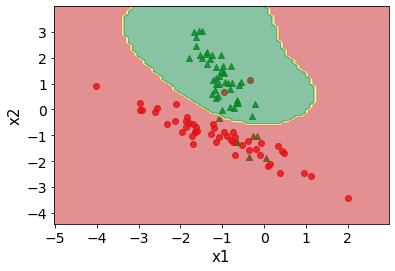

In [64]:
plot_decision_boundaries(Xcl2, ycl2, SVC, random_state=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

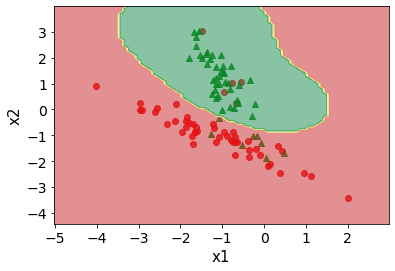

In [65]:
plot_decision_boundaries(Xcl3, ycl3, SVC, random_state=1)

### 1NN

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

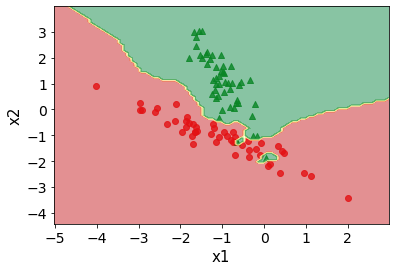

In [66]:
plot_decision_boundaries(Xcl1, ycl1, KNeighborsClassifier, n_neighbors=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

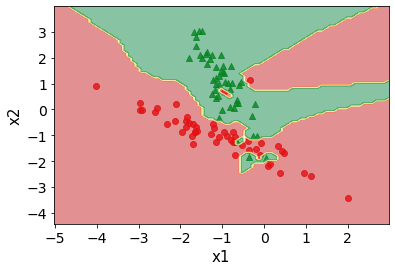

In [67]:
plot_decision_boundaries(Xcl2, ycl2, KNeighborsClassifier, n_neighbors=1)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

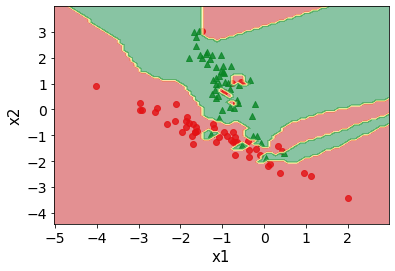

In [68]:
plot_decision_boundaries(Xcl3, ycl3, KNeighborsClassifier, n_neighbors=1)